# Analysing Star Wars

by `Nurseiit Abdimomyn`

id `20172001`

at `nurs@unist.ac.kr`

In [1]:
import csv # here we go again :P
import networkx as nx
from operator import itemgetter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# all episodes
episodes = {}
ep_all = []

for i in range(1, 7):
    with open('data/StarWars_ep%d.csv' % i, 'r') as f:
        reader = csv.reader(f)
        ep = [event for event in reader][1:] # ignore header
        episodes[i] = ep
        # add events to ep_all
        for event in ep:
            ep_all.append(event)

In [3]:
scenes = {}
actors = {}

for event in ep_all:
    sequence = int(event[2])
    scenes[sequence] = int(event[1])
    actors[sequence] = event[5]

In [4]:
all_actors = list(set([actor[1] for actor in actors.items()]))
all_scenes = list(set([scene[1] for scene in scenes.items()]))

scenes_with_actors = {}

for sequence, scene in scenes.items():
    actor = actors[sequence]
    if actor == 'LURE':
        actor = 'LUKE'
    if scene not in scenes_with_actors:
        scenes_with_actors[scene] = set()
    scenes_with_actors[scene].add(actor)

actor_edges = []
for i in scenes_with_actors:
    for _to in scenes_with_actors[i]:
        for _from in scenes_with_actors[i]:
            if _to != _from:
                actor_edges.append((_from, _to))
                
actor_edges = list(set(actor_edges))

In [5]:
Q = nx.Graph()
Q.add_nodes_from(all_actors)
Q.add_edges_from(actor_edges)
print(nx.info(Q))

Name: 
Type: Graph
Number of nodes: 96
Number of edges: 274
Average degree:   5.7083


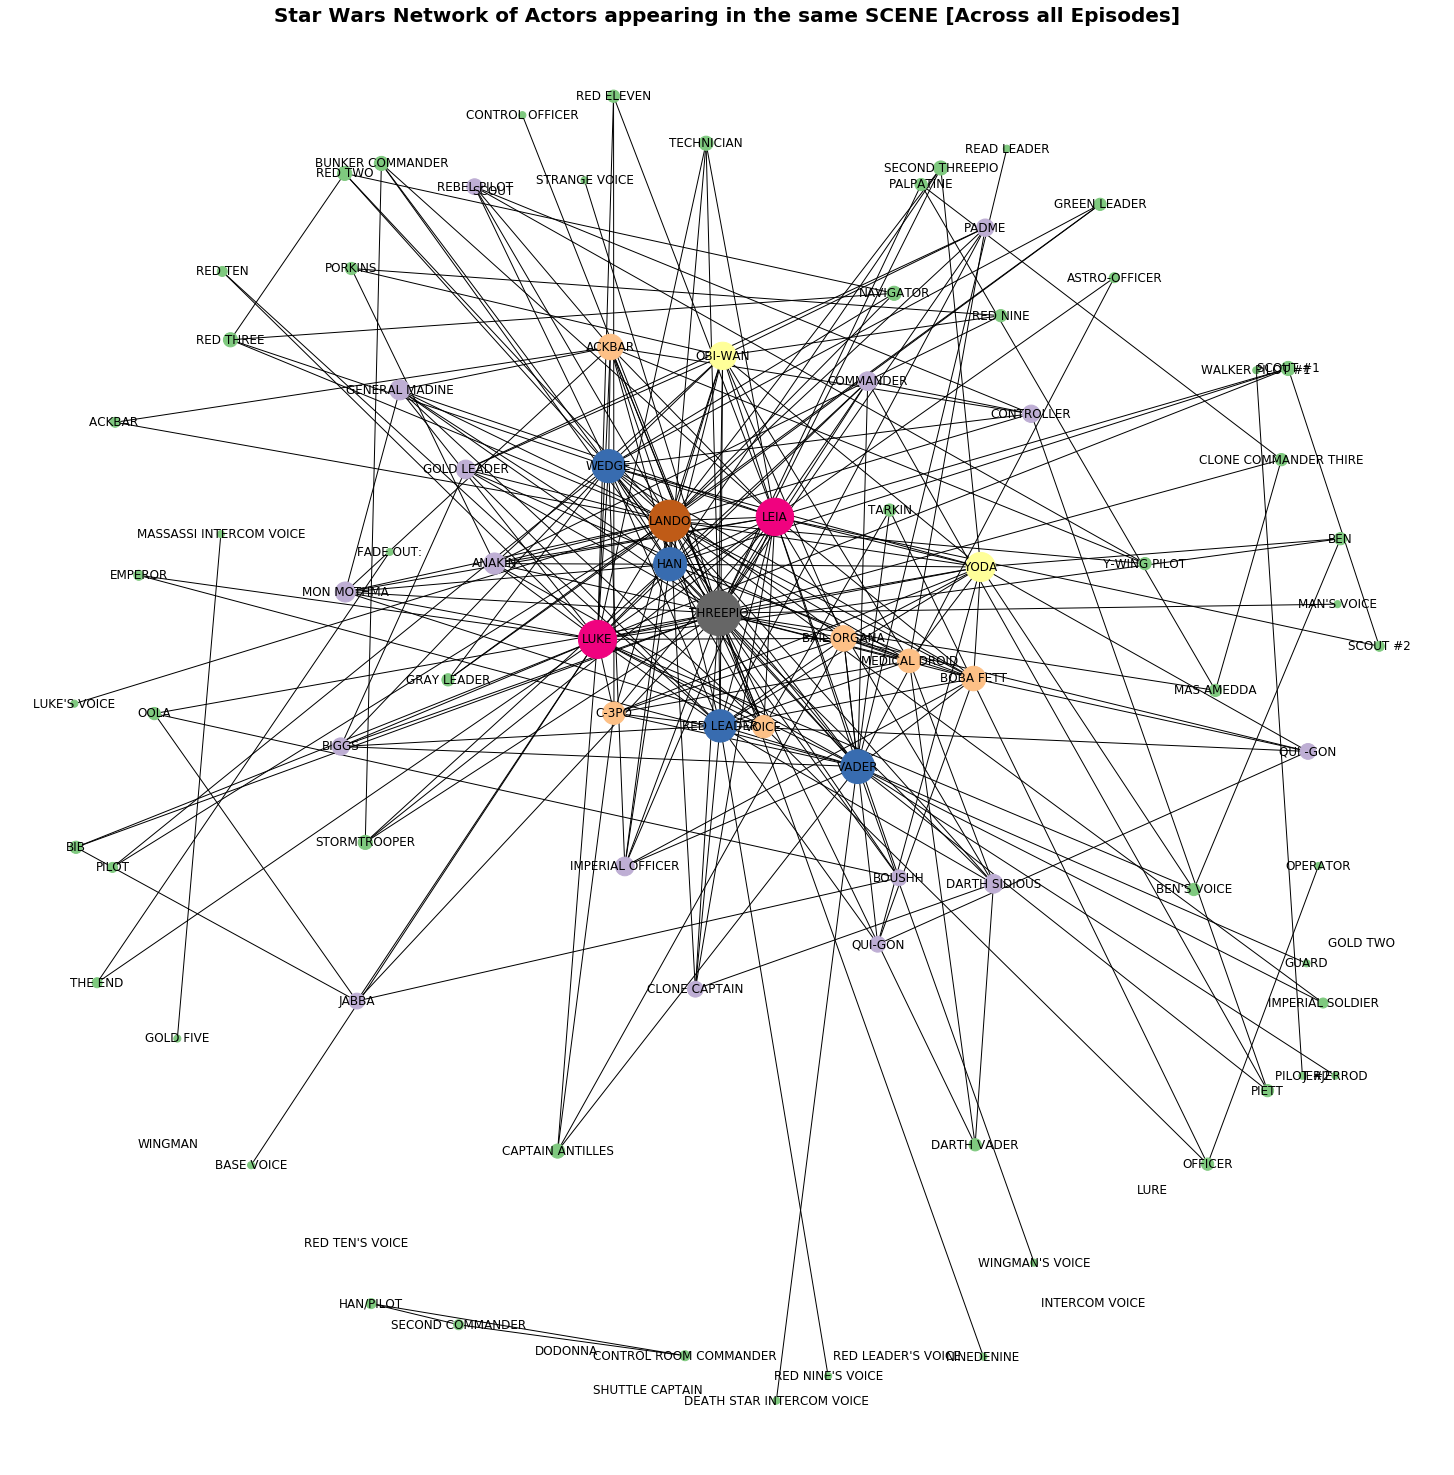

In [6]:
pos = nx.spring_layout(Q, k = 1)
dig = dict(nx.degree(Q))
plt.figure(figsize = (20, 20))
nx.draw(Q, pos, with_labels = True,
        node_size = [d * 50 for d in dig.values()],
        node_color = list(dig.values()),
        font_size = 12,
        cmap=plt.cm.Accent
       )
plt.title('Star Wars Network of Actors appearing in the same SCENE [Across all Episodes]',
          fontsize=20,
          fontweight='bold'
         )
plt.show()

In [7]:
betweennes = nx.betweenness_centrality(Q)

# normalise character names
betweennes['ANAKIN'] += betweennes['VADER']
betweennes['THREEPIO'] += betweennes['C-3PO']
del betweennes['VADER']
del betweennes['C-3PO']

In [8]:
sorted_betweennes = sorted(betweennes.items(), key=itemgetter(1), reverse=True)

sorted_betweennes[:5]

[('THREEPIO', 0.20908876399497467),
 ('LANDO', 0.14103000456523213),
 ('LUKE', 0.13145816447766775),
 ('ANAKIN', 0.11958044162735626),
 ('LEIA', 0.06965185713609993)]